In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.2)

In [2]:
# color = plt.get_cmap('RdYlGn')
# color.set_bad('lightblue')
# h_map = sns.heatmap(data=cor_mat, annot=True, cmap=color)

color_map = sns.color_palette("light:#00700c", as_cmap=True)
color_map.set_bad('black')

### SCIQ

In [3]:
data_sciq_vs = [[0.64,0.82,1,2.7,0.004,0.33],
                [0.18,0.66,0.01,2.7,0.008,0.46],
                [0.34,0.78,1,2.8,0.004,0.37]]
                
index_col = ['sciq_sciq', 'sciq_qasc', 'sciq_cs']
data_sciq_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_sciq_vs)
data_sciq_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
sciq_sciq,0.64,0.82,1.00,2.7,0.004,0.33
sciq_qasc,0.18,0.66,0.01,2.7,0.008,0.46
sciq_cs,0.34,0.78,1.00,2.8,0.004,0.37


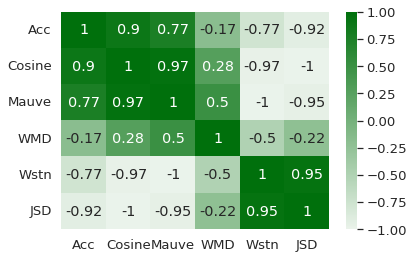

In [4]:
sns.heatmap(data_sciq_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

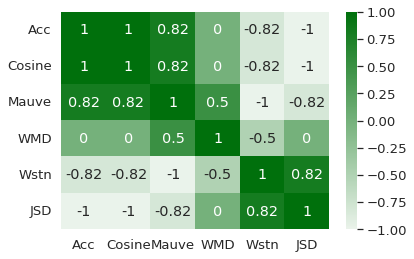

In [5]:
# kendall correlation
sns.heatmap(data_sciq_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

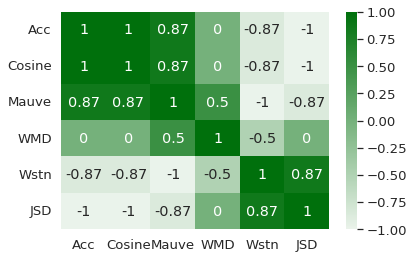

In [6]:
# spearman correlation
sns.heatmap(data_sciq_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

###CS

In [7]:
data_cs_vs = [[0.49,0.71,0.94,2.45,0.003,0.45],
               [0.58,0.62,0.01,2.79,0.007,0.48],
               [0.84,0.61,0.004,2.78,0.005,0.49]]
               
index_col = ['cs_cs', 'cs_sciq', 'cs_qasc']
data_cs_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_cs_vs)
data_cs_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
cs_cs,0.49,0.71,0.940,2.45,0.003,0.45
cs_sciq,0.58,0.62,0.010,2.79,0.007,0.48
cs_qasc,0.84,0.61,0.004,2.78,0.005,0.49


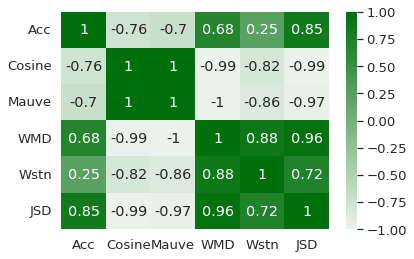

In [8]:
sns.heatmap(data_cs_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

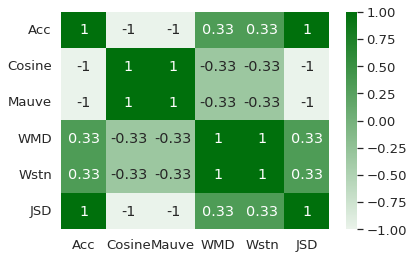

In [9]:
# kendall correlation
sns.heatmap(data_cs_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

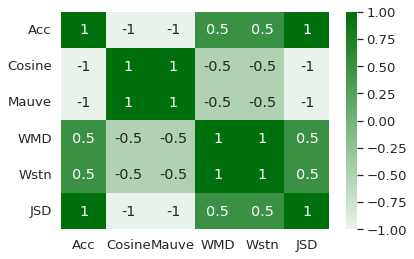

In [10]:
# spearman correlation
sns.heatmap(data_cs_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

###QASC

In [11]:
data_qasc_vs = [[0.92,0.75,1,2.96,0.003,0.4],
                [0.51,0.78,0.99,2.94,0.004,0.38],
                [0.48,0.66,0.004,2.88,0.006,0.48]]

index_col = ['qasc_qasc', 'qasc_sciq', 'qasc_cs']
data_qasc_vs = pd.DataFrame(columns=['Acc', 'Cosine', 'Mauve', 'WMD', 'Wstn', 'JSD'], 
                  index=index_col,
                  data=data_qasc_vs)
data_qasc_vs

,Acc,Cosine,Mauve,WMD,Wstn,JSD
qasc_qasc,0.92,0.75,1.000,2.96,0.003,0.40
qasc_sciq,0.51,0.78,0.990,2.94,0.004,0.38
qasc_cs,0.48,0.66,0.004,2.88,0.006,0.48


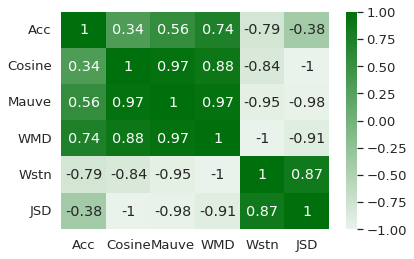

In [12]:
sns.heatmap(data_qasc_vs.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

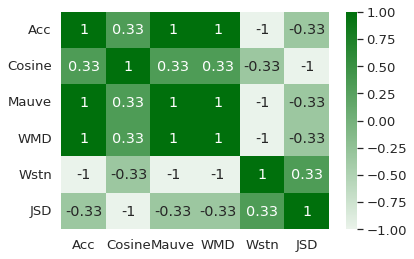

In [13]:
# kendall correlation
sns.heatmap(data_qasc_vs.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

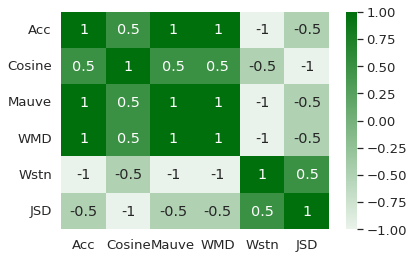

In [14]:
# spearman correlation
sns.heatmap(data_qasc_vs.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)

##Average

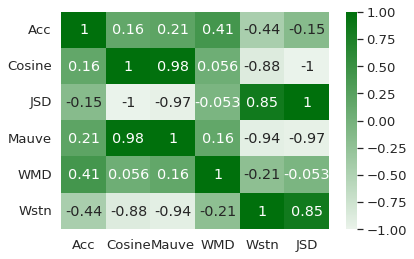

In [15]:
# Pearson Correlation
def average_of_all_three(df_1, df_2, df_3, corr):        
    df_concat = pd.concat((df_1.corr(method=corr), df_2.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_first_two_sum = by_row_index.sum()

    df_concat = pd.concat((df_first_two_sum, df_3.corr(method=corr)))
    by_row_index = df_concat.groupby(df_concat.index)
    df_sum = by_row_index.sum()

    sns.heatmap(df_sum/3, vmin=-1, vmax=1, annot=True, cmap=color_map)

average_of_all_three(data_sciq_vs, data_cs_vs, data_qasc_vs, 'pearson')

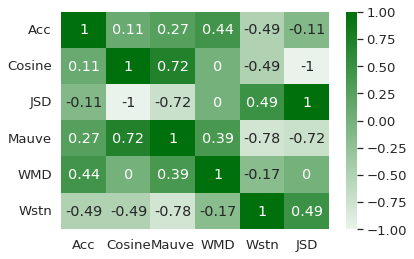

In [16]:
# Kendall Correlation
average_of_all_three(data_sciq_vs, data_cs_vs, data_qasc_vs, 'kendall')

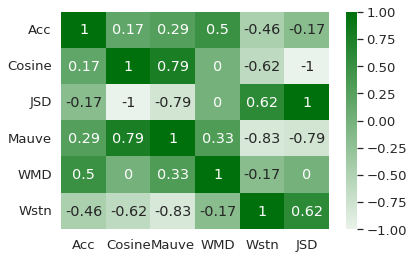

In [17]:
# Spearman Correlation
average_of_all_three(data_sciq_vs, data_cs_vs, data_qasc_vs, 'spearman')

##Combined

In [ ]:
df_qa = data_sciq_vs.append(data_cs_vs)
df_qa = df_qa.append(data_qasc_vs)
df_qa

,Acc,Cosine,Mauve,WMD,Wstn,JSD
sciq_sciq,0.64,0.69,0.99,2.83,0.00350,0.45
sciq_qasc,0.18,0.57,1.00,2.85,0.00353,0.53
sciq_cs,0.34,0.63,0.18,2.68,0.00440,0.48
cs_cs,0.49,0.71,0.94,2.45,0.00350,0.45
cs_sciq,0.58,0.63,0.59,2.76,0.00380,0.48
cs_qasc,0.84,0.64,0.49,2.71,0.00310,0.52
qasc_qasc,0.92,0.60,0.99,2.84,0.00340,0.54
qasc_sciq,0.51,0.66,0.91,2.93,0.00360,0.49
qasc_cs,0.48,0.63,0.91,2.76,0.00410,0.51


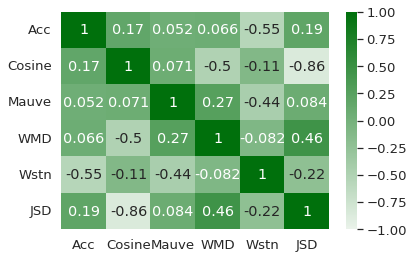

In [ ]:
# pearson correlation
sns.heatmap(df_qa.corr(), vmin=-1, vmax=1, annot=True, cmap=color_map)

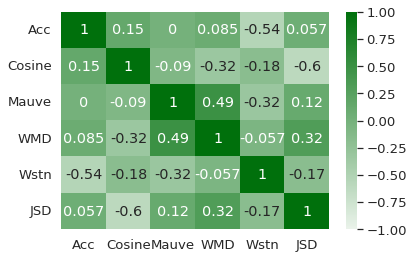

In [ ]:
# kendall correlation
sns.heatmap(df_qa.corr(method='kendall'), vmin=-1, vmax=1, annot=True, cmap=color_map)

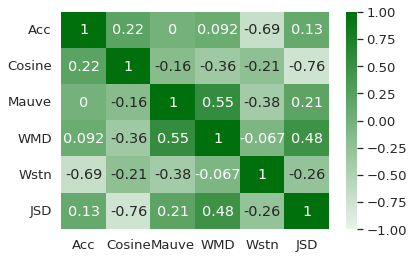

In [ ]:
# spearman correlation
sns.heatmap(df_qa.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap=color_map)